 Exploring the relationship between news and stock returns using machine learning. You are given a file called `news-data.csv`, that contains financial news (headlines) and daily returns for some companies.

*Note: These are sample solutions. Some questions may have alternate solutions.*

In [ ]:
####################### Import required libraries ##########################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Markdown, display
from finml import *
%matplotlib inline

# for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Helpful commands

You may find the following commands helpful to complete some of the questions.

1. *How to create a new column using data from existing column?* Consider a dataframe `df` with a column called `score`. Suppose we wanted to divide all the values of this variable by `100` and store the outcome in a new column called `score_scaled`. This can be done in one step. The code `df['score_scaled'] = df['score']/100` creates a new column with the name `score_scaled` and stores the modified values.


2. *How to separate a string variable into a list of strings?* The method `split()` splits a string into a list based on a specified separator. The default separator is any white space. However, one can specify the intended separator as an argument. For example, the code `"a,b,c".split(",")` splits the string `"a,b,c"` into the list `[a, b, c]`.


3. *How to use string functions on a dataframe column?*. You can use string functions such as `split()` on a `Pandas` `dataframe` column by using the `str` attribute. For example, `df['alphabets'].str.split(",")` returns a series (consider a series as a `dataframe` with one column) that contains a list obtained by running the split function on each entry in the column named `alphabets`.


4. *How to chain multiple string operations in `Pandas`?* Note that a string function on a `Pandas` column returns a series. One can then use another string function on this series to chain multiple operations. For example, the cell below first converts the string to upper case and then calls the split function.


5. *How to combine two or more data frames?* For this purpose, one can use the `concat` function from `Pandas`. To combine the `dataframes` to match indices you can use the `axis=1` argument. Please see https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html for examples.


6. *How to change the index of a dataframe?* The `set_index(column_name)` function makes the column with name `column_name` as the index of the dataframe.

In [ ]:
################################################################
# Example of string operations
################################################################

# Sample data as a dictionary
example_data = {'alphabets':['a,b,c', 'd,e,f', 'a,z,x', 'a,s,p']}

# Create a dataframe from the sample data
example_df = pd.DataFrame(example_data)

# Chain two string operations
example_df['alphabets'].str.upper().str.split(",")

0    [A, B, C]
1    [D, E, F]
2    [A, Z, X]
3    [A, S, P]
Name: alphabets, dtype: object

### Details of the news data.

The news data set has the following four columns :

1. `date`: This column contains the date of the observation.

2. `ticker`: The ticker symbol of the company

3. `returns`: This column contains the daily returns.

4. `headlines`: This column contains the concatenation of headlines for that date. The headlines are separated by the `<END>` string. For example, if there are three headlines `h1`, `h2`, and `h3` on a given day, the headline cell for that day will be the string `h1<END>h2<END>h3`.



## Question 1 (1 mark)
You will be plotting the returns as timeseries and histogram for **Johnson & Johnson (JNJ)**. Please use the provided variable names for the pandas dataframes. You should use the `parse_dates` argument to correctly parse the values in the date column (You can read more about this argument here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [ ]:
# Load the data in a datagrame
df = pd.read_csv("news_data.csv", parse_dates=['date'])

# Create a new dataframe by filtering the rows where ticker is 'JNJ'.
jnj = df[df['ticker'] == "JNJ"]
jnj

,date,ticker,returns,headlines
1,2010-01-04,JNJ,0.004192,AT A GLANCE: EMEA Equities Highlights To Jan 4...
3,2010-01-05,JNJ,-0.011596,SportsTicker: Jets Owner's Daughter; J&amp;J H...
7,2010-01-06,JNJ,0.008134,Johnson &amp; Johnson Agency To Acquire Sunbel...
10,2010-01-07,JNJ,-0.007137,Johnson &amp; Johnson (JNJ) Mkt On Close Buy I...
16,2010-01-08,JNJ,0.003438,UPDATE: Vivus Obesity Drug Shows Effectiveness...
...,...,...,...,...
8744,2019-12-17,JNJ,0.012483,Johnson &amp; Johnson Raised to Overweight Fro...
8746,2019-12-18,JNJ,-0.002577,J&amp;J Gets Another Win In Baby Powder Lawsui...
8749,2019-12-19,JNJ,0.015085,Johnson &amp; Johnson Raised to Overweight Fro...
8752,2019-12-20,JNJ,0.004885,J&amp;J's Janssen Gets European Approval for S...


### Q1 (i) [0.5]

Write Python code that plots lot the time series of daily rate of returns of Johnson & Johnson (JNJ) (returns on the y-axis and dates on the x-axis). Please ensure that your plot is appropriately labelled. You should use the `jnj` variable for the data source of the plot.

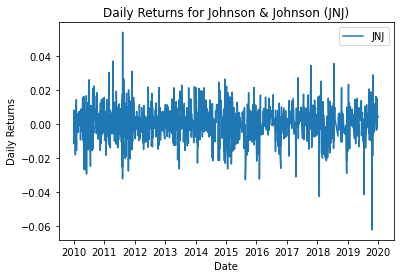

In [ ]:
plt.plot('date', 'returns', data=jnj, label='JNJ')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns for Johnson & Johnson (JNJ)')
plt.legend();u

### Q1 (ii) [0.5]

Write Python code to plot the histogram (binned in 200 buckets) of the daily rate of returns of Johnson & Johnson (JNJ). Please ensure that your plot is appropriately labelled. You should use the `jnj` variable for the data source of the plot.

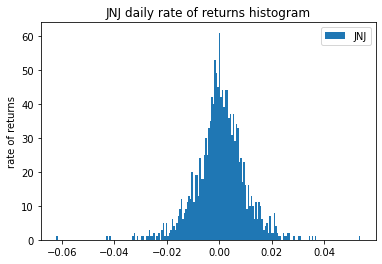

In [ ]:
# Your code here for histogram plot
plt.hist(jnj['returns'], bins=200, label='JNJ')
plt.ylabel('rate of returns')
plt.title('JNJ daily rate of returns histogram')
plt.legend();

## Question 2 (3 marks)

Analyse the statistical properties of the returns for **Johnson & Johnson (JNJ)**.

### Q2 (i) [1]
Use Python to compute the *mean, standard deviation, skewness, and kurtosis* for the returns of **Johnson & Johnson (JNJ)**. Store the values in the pre-defined variables. You should use the `jnj` variable.

In [ ]:
mean = jnj['returns'].mean(axis=0)
std = jnj['returns'].std(axis=0)
skewness = jnj['returns'].skew(axis=0)
kurtosis = jnj['returns'].kurtosis(axis=0)

print(f'Mean: {mean}')
print(f'Standard deviation: {std}')
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

Mean: 0.00044027268403597333
Standard deviation: 0.009440179399120232
Skewness: -0.22898341587177432
Kurtosis: 3.2335317782480093


In [ ]:
# solution
epsilon = 0.00001
sol_mean=0.00044027268403597333
sol_std=0.009440179399120232
sol_skew=-0.22898341587177432
sol_kurtosis=3.2335317782480093

### Q2 (ii) [1]
Statistically check if the distribution of daily returns are Normally distributed. Justify your answer by running a *Jarque–Bera test* on the rate of returns using Python. Please store the value of the Jarque-Bera stats and the corresponding p-value in the pre-defined variables.

For your convenience, the `stats` package from `scipy` is already part of the initial imports. You can find more information on the Jarque-Bera test in scipy here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html

In [ ]:
jb_results = stats.jarque_bera(jnj['returns'])

jarque_bera_stats = jb_results.statistic
p_value = jb_results.pvalue

print(f'Jarque Bera: {jarque_bera_stats}')
print(f'P-value: {p_value}')

Jarque Bera: 635.2808439461214
P-value: 0.0


In [ ]:
epsilon = 0.00001
sol_jb = 635.2808439461214
sol_p = 0.0

### Q2 (iii) [1]
Based on the results of the Jarque-Bera test, discuss if the returns are Normally distributed.

The p-value of Jarque Bera test is 0.000. Therefore we reject the hypothesis that JNJ rate of return distribution is normal.

## Question 3 (3 marks)
Next, you will analyse the news data.

### Q3 (i) [1]
Add a new column called `headlines_count`  in the `jnj` dataframe that stores the daily frequency of headlines (i.e, the number of headlines per day).

In [ ]:
separator_token = "<END>"
jnj['headlines_count'] = jnj['headlines'].str.split(separator_token).str.len()

### Q3 (ii) [1]

Write Python code that plots the time series of daily headline frequencies (the number of headlines per day on the y-axis and the corresponding date on the x-axis) for **Johnson & Johnson (JNJ)**. You should use the `jnj` variable. Your plot should be appropriately labelled.


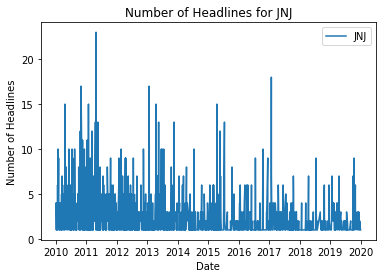

In [ ]:
# Your code here for the plot
plt.plot('date', 'headlines_count', data=jnj, label='JNJ')
plt.xlabel("Date")
plt.ylabel("Number of Headlines")
plt.title("Number of Headlines for JNJ")
plt.legend();


### Q3 (iii) [0.5]
Calculate the correlation between the headline frequencies and the daily returns. You should use the Person correlation available from the scipy package (see here for more information: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html). You should use the `jnj` dataframe. Please use the pre-defined variable to store the value of correlation.

In [ ]:
# Correlation
corr_results = stats.pearsonr(jnj['returns'], jnj['headlines_count'])
corr_coef = corr_results[0]
p_value = corr_results[1]

print(f"Correlation cofficient is {corr_coef} with a p-value of {p_value}")

Correlation cofficient is -0.014717542337404802 with a p-value of 0.5764219841369359


In [ ]:
# solution
epsilon = 0.00001
sol_corr = -0.014717542337404802
sol_p = 0.5764219841369359

### Q3 (iv) [0.5]
Discuss your findings from the correlation test.

Slight negative correlation, with a p-value of 0.576. Hence, the correlation coefficient is not significant.

## Question 4 (1 mark)

In at most three sentences explain the role of NLP and the use of `tf-idf` technique **in the context of the data set**. Write your answer below.

Key points:
- TF-IDF is a formal (or statistical) measure that allows us to evaluate quantitatively the relevance of a word to  a document, given a library or collection of documents.
- TF-IDF is a technique to process natural language documents for the purpose of ML techniques.
- The given data set includes news headlines (i.e., natural language) for respective companies.
- TF-IDF allows quantitatively measuring relevance of words such that we can use the measure and relate to stock returns.

## Question 5 (4 marks)

We will use neural networks to explore the relationship between the content of financial news and the direction of stock returns, i.e., their classification into positive or negative returns. *Note you will use the data for all companies provided to you.*

### Q5 (i) [1]
Create a new column called `returns_direction` in the `df` dataframe that classifies daily returns based on their direction: it assigns a given return a value of 1, if the return is positive (i.e, greater than 0), and a value of 0 otherwise.


In [ ]:
df['returns_direction'] = np.where(df['returns']>0, 1, 0)
df

,date,ticker,returns,headlines,returns_direction
0,2010-01-04,MSFT,0.015420,MARKETWATCH VIEW: Wal-Mart Tops List Of Advise...,1
1,2010-01-04,JNJ,0.004192,AT A GLANCE: EMEA Equities Highlights To Jan 4...,1
2,2010-01-05,MSFT,0.000323,Stock-Fund Investors Greet New Year With A Gri...,1
3,2010-01-05,JNJ,-0.011596,SportsTicker: Jets Owner's Daughter; J&amp;J H...,0
4,2010-01-05,JPM,0.019370,Swiss Re Enters Into $1B long-term Letter of C...,1
...,...,...,...,...,...
8755,2019-12-27,JPM,0.000719,FINRA Sanctions Citigroup Global Markets Inc.;...,1
8756,2019-12-31,AMZN,0.000514,Apple's Stock Rises Toward Record While The Do...,1
8757,2019-12-31,JNJ,0.003923,XBiotech Shares Climb Nearly 8% in After Hours...,1
8758,2019-12-31,MSFT,0.000698,Microsoft Discusses Court Action Against Hacki...,1


### Q5 (ii) [1]
Count the number of days on which a stock had positive and non-positive returns, respectively. You should use the `groupby` and `value_counts` function from Pandas. You should store the count in the pre-defined variable.

In [ ]:
counts_df = df.groupby(["ticker"])["returns_direction"].value_counts()
counts_df

ticker  returns_direction
AMZN    1                     962
        0                     841
JNJ     1                     759
        0                     684
JPM     1                    1017
        0                     969
MSFT    1                     927
        0                     892
XOM     1                     863
        0                     846
Name: returns_direction, dtype: int64

### Q5 (iii) [1]
Build and train a two-layer neural network with three units (neurons) to explain return directions based on financial news. You will use the combined data of all companies for this task. Report and interpret the following performance measures: "Precision", "Recall", "Accuracy" and "ROC".

In [ ]:
# Get the X's and y's
X_text = df["headlines"].values
y = df["returns_direction"].values

# Split the data in 80/20
(train_news, y_train, test_news, y_test) = split_by_threshold(X_text, y, test_size=0.2)
tfidf_input = (train_news, y_train, test_news, y_test)

# NLP
(X_train, X_test, vectorizer, k_best_selector) = tfidf_vectorize(tfidf_input)
output = (X_train, y_train, X_test, y_test)

# NN
model = build_model(X_train.shape[1:], layers=2, units=3);
model = train_model(output, model, verbose=0);
model.summary()

evaluate(model, output)

2021-09-20 19:24:23.170597: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-20 19:24:23.625888: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-20 19:24:23.628465: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1995310000 Hz


Training Completed
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 20000)]           0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 3)                 60003     
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 3)                 12        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 4         
Total params: 60,019
Trainable params: 60,019
Non-trainable params: 0
_________________________________________________________________
########################################
############## Test Set: ###############
########################################
Precision:  0.5368360936607652
Recall:  1.0
Accuracy Score:  0.5371004566210046
Area under ROC curve:  0.52776897

Note: The values may be slightly different due to stochasticity.

Key points
- ROC is the more important metric. ROC of training is higher than ROC of testing. This is expected, but the difference is significant pointing to potential overfitting on training data.
- Recall is biased (very close to 1) as compared to Precision.

Interpretation could be based on either Precision/Recall or Confusion matrix or both.

### Q5 (iv) [1]

Discuss the results of your model. If you think the model performs well (or poorly), explain why with reference to the relevant performance measures. You should present the values for the metrics separately for training and testing data.

#### Training
- Precision:  0.0
- Recall:  0.0
- Accuracy Score:  0.0
- Area under ROC curve:  0.0

#### Testing
- Precision:  0.0
- Recall:  0.0
- Accuracy Score:  0.0
- Area under ROC curve:  0.0


Key points
- Accuracy provides less information.
- Based on the context one may prefer a higher precision or higher recall. If both false positive and false negative are important (as in this case) then we should not have a bias towards one of the metrics.
- For example, we prefer a model that correctly identifies word that are linked to stock returns, but also correctly identifies words that are unrelated.
- A higher recall could be due to presence of noise.


## Question 6 (3 marks)

Explore the effects of different splits between the training and testing data on the performance of a given neural network model. Note that we are changing the number of layers, units and the split between training and test size.

You should duplicate the table format in your own markdown cell and replace the "-" placeholders with the corresponding values for the **test** data set. Discuss the impact of changing the number of layers/units and the train/test split, respectively.

You should use **loop(s)** to build, train, and evaluate the neural networks.

To avoid excessive training output, you should set the parameter `verbose=0` in your submission.

| Num. Layers/Num. Units| Train/Test split | Precision  | Recall | Accuracy | ROC|
| --------- |:---------:| -----:| -----:| -----:|-----:|
| 2/3 | 90/10 | - |- |- |- |
| 3/5 | 90/10 | - |- |- |- |
| 2/3 | 60/40 | - |- |- |- |
| 3/5 | 60/40 | - |- |- |- |


In [ ]:
# define the configs
configs = [[2, 3], [3, 5]]
data_splits = [0.1, 0.4]

X_text = df.headlines.values
y = df.returns_direction.values


for test_size in data_splits:
    data = split_by_threshold(X_text, y, test_size=test_size)
    (train_texts, y_train, test_texts, y_test) = data
    x_train, x_test, vectorizer, k_best_selector = tfidf_vectorize(data)
    data = (x_train, y_train, x_test, y_test)
    for c in configs:
        layers = c[0]
        units = c[1]

        print(f"Training and evaluating a model with {test_size} test size, {layers} layers, and {units} units.")
        model = build_model(
            x_train.shape[1:],
            layers=layers,
            units=units
        )

        # model.summary()

        model = train_model(data, model, batch_size=x_train.shape[0], verbose=0)
        evaluate(model, data)
        print("Finished training and evaluating.")

Training and evaluating a model with 0.1 test size, 2 layers, and 3 units.
Training Completed
########################################
############## Test Set: ###############
########################################
Precision:  0.5399543378995434
Recall:  1.0
Accuracy Score:  0.5399543378995434
Area under ROC curve:  0.5170549630414597
Confusion matrix: 
[[  0 403]
 [  0 473]]

########################################
############## Train Set: ##############
########################################
Precision:  0.5182817693684479
Recall:  0.9997533908754624
Accuracy Score:  0.5219431760527651
Area under ROC curve:  0.9320796027718891
Confusion matrix: 
[[  61 3768]
 [   1 4054]]
Finished training and evaluating.
Training and evaluating a model with 0.1 test size, 3 layers, and 5 units.
Training Completed
########################################
############## Test Set: ###############
########################################
Precision:  0.5491803278688525
Recall:  0.8498942917547568
Ac

## Question 7 (5 marks)

Everything you did so far was explaining stock returns with contemporaneous financial news that were released on the same date. This question will explore how well a neural network can **predict** the direction of **future** returns based on our text data.

### Q7 (i) [1]

Please read the `JNJ_returns.csv` into a dataframe variable `jnj_returns`. You should use the `parse_dates` argument. Then, create a new column  `returns_pred` by shifting the returns by one **trading** day. For this purpose, you may find the `shift` function from `Pandas` helpful.

In [ ]:
jnj_returns = pd.read_csv("JNJ_returns.csv", parse_dates=['date'])
jnj_returns = jnj_returns.set_index("date")
jnj_returns['returns_direction'] = np.where(jnj_returns['ret']>0, 1, 0)
jnj_returns['returns_pred'] = jnj_returns['returns_direction'].shift(-1)
jnj_returns = jnj_returns.dropna()

jnj_returns

,ret,returns_direction,returns_pred
date,,,
2010-01-04,0.004192,1,0.0
2010-01-05,-0.011596,0,1.0
2010-01-06,0.008134,1,0.0
2010-01-07,-0.007137,0,1.0
2010-01-08,0.003438,1,1.0
...,...,...,...
2019-12-23,0.002602,1,0.0
2019-12-24,-0.003483,0,0.0
2019-12-26,-0.000685,0,0.0


### Q7 (ii) [1]

Combine the `jnj_returns` dataframe with the `jnj` dataframe such that for a given headline date, the value in `returns_pred` contains the return on the **subsequent** trading day. You should store the result of the concatenated data in the pre-defined variable `joined_df`.

In [ ]:
jnj = jnj.set_index("date")
joined_df = pd.concat([jnj, jnj_returns], axis=1, join="inner")
joined_df

,ticker,returns,headlines,ret,returns_direction,returns_pred
date,,,,,,
2010-01-04,JNJ,0.004192,AT A GLANCE: EMEA Equities Highlights To Jan 4...,0.004192,1,0.0
2010-01-05,JNJ,-0.011596,SportsTicker: Jets Owner's Daughter; J&amp;J H...,-0.011596,0,1.0
2010-01-06,JNJ,0.008134,Johnson &amp; Johnson Agency To Acquire Sunbel...,0.008134,1,0.0
2010-01-07,JNJ,-0.007137,Johnson &amp; Johnson (JNJ) Mkt On Close Buy I...,-0.007137,0,1.0
2010-01-08,JNJ,0.003438,UPDATE: Vivus Obesity Drug Shows Effectiveness...,0.003438,1,1.0
...,...,...,...,...,...,...
2019-12-10,JNJ,-0.003630,XBiotech Shares Double After Selling Bermekima...,-0.003630,0,1.0
2019-12-17,JNJ,0.012483,Johnson &amp; Johnson Raised to Overweight Fro...,0.012483,1,0.0
2019-12-18,JNJ,-0.002577,J&amp;J Gets Another Win In Baby Powder Lawsui...,-0.002577,0,1.0


Key is to ensure date is common for headlines and returns.

### Q7 (iii) [1]

Train a neural network that uses financial news to learn the `returns_pred` variable.
Use the given network parameters.
To avoid excessive training output, you should set the parameter `verbose=0` in your submission.

In [ ]:
# run the neural network
df = joined_df.dropna()
X_text = df.headlines.values
y = df.returns_pred.values

# Split the data in 80/20
(train_news, y_train, test_news, y_test) = split_by_threshold(X_text, y, test_size=0.2)
tfidf_input = (train_news, y_train, test_news, y_test)

# NLP
(X_train, X_test, vectorizer, k_best_selector) = tfidf_vectorize(tfidf_input)
output = (X_train, y_train, X_test, y_test)

# NN
model = build_model(X_train.shape[1:], layers=3, units=5);
model = train_model(output, model, verbose=0);
model.summary()

evaluate(model, output)

Training Completed
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 5057)]            0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 5)                 25290     
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 5)                 30        
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 5)                 30        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 6         
Total params: 25,356
Trainable params: 25,356
Non-trainable params: 0
_________________________________________________________________
########################################
############## Test Set: ###############
######################

### Q7 (iv) [2]

Interpret your results in the context of the Efficient Market Hypothesis (EMH). (Max: 300 words)


Key points
- The frequency of returns data is daily whereas news arrives at a higher frequency
- We are using a simple (think of it as a low effort) model to capture the relationship of news and returns
- If news had information that was not yet incorporated in the prices, we would expect arbitrage forces to act on it and thus making prices more informative. The arbitrage in stock markets are mostly automated, and hence we expect any discrepancies to disappear in much shorter time frame than a day.
- We also don't expect a simple low effort model to be able to consistently predict prices from publicly available news.